In [2]:
import pandas as pd 
import numpy as np 


In [3]:
error = pd.read_csv('PdM_errors.csv')
failure = pd.read_csv('PdM_failures.csv')
machine=pd.read_csv('PdM_machines.csv')
data = pd.read_csv('PdM_telemetry.csv')
maint = pd.read_csv('PdM_maint.csv')

# DATA CLEANING

In [4]:
error.head(3),failure.head(3),machine.head(3),data.head(3),maint.head(3)

(              datetime  machineID errorID
 0  2015-01-03 07:00:00          1  error1
 1  2015-01-03 20:00:00          1  error3
 2  2015-01-04 06:00:00          1  error5,
               datetime  machineID failure
 0  2015-01-05 06:00:00          1   comp4
 1  2015-03-06 06:00:00          1   comp1
 2  2015-04-20 06:00:00          1   comp2,
    machineID   model  age
 0          1  model3   18
 1          2  model4    7
 2          3  model3    8,
               datetime  machineID        volt      rotate    pressure  \
 0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
 1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
 2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
 
    vibration  
 0  45.087686  
 1  43.413973  
 2  34.178847  ,
               datetime  machineID   comp
 0  2014-06-01 06:00:00          1  comp2
 1  2014-07-16 06:00:00          1  comp4
 2  2014-07-31 06:00:00          1  comp3)

In [5]:
data.shape[0],machine.shape[0],failure.shape[0],maint.shape[0],error.shape[0]

(876100, 100, 761, 3286, 3919)

In [6]:
data['machineID'].nunique(),machine['machineID'].nunique()

(100, 100)

In [7]:
data1 = pd.merge(data, machine, on='machineID', how='outer')


In [8]:
data1.shape[0]

876100

In [9]:
data1.head(3)

,datetime,machineID,volt,rotate,pressure,vibration,model,age
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18


In [10]:
data2 = pd.merge(data1,maint,on=['datetime','machineID'],how='left')

In [11]:
data2.shape[0]

876823

In [12]:
data2.head(2)

,datetime,machineID,volt,rotate,pressure,vibration,model,age,comp
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,NaN


In [13]:
data3 = pd.merge(data2,failure,on=['datetime','machineID'],how='left')

In [14]:
data3.shape[0]

876906

In [15]:
data3.head(2)

,datetime,machineID,volt,rotate,pressure,vibration,model,age,comp,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,NaN,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,NaN,NaN


In [16]:
data4 = pd.merge(data3,error,on=['datetime','machineID'],how='left')

In [17]:
data4.shape[0]

877209

In [18]:
data4.head(2)

,datetime,machineID,volt,rotate,pressure,vibration,model,age,comp,failure,errorID
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,NaN,NaN,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,NaN,NaN,NaN


In [19]:
data4.rename(columns={'comp':'maint'},inplace=True)

In [20]:
data4.isnull().sum()

datetime          0
machineID         0
volt              0
rotate            0
pressure          0
vibration         0
model             0
age               0
maint        874241
failure      876087
errorID      873285
dtype: int64

In [21]:
data4['failure'].unique()

array([nan, 'comp4', 'comp1', 'comp2', 'comp3'], dtype=object)

In [22]:
data4['errorID'].unique()

array([nan, 'error1', 'error3', 'error5', 'error4', 'error2'],
      dtype=object)

In [23]:
data4['maint'].unique()

array([nan, 'comp4', 'comp1', 'comp3', 'comp2'], dtype=object)

In [24]:
data4['maint'].fillna('No_main',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15292\3348261391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data4['maint'].fillna('No_main',inplace=True)


In [25]:
data4['errorID'].fillna('No_Error',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15292\2352282383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data4['errorID'].fillna('No_Error',inplace=True)


In [26]:
data4['failure'].fillna('NoFail',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15292\4241670366.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data4['failure'].fillna('NoFail',inplace=True)


In [27]:
data4.isnull().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
model        0
age          0
maint        0
failure      0
errorID      0
dtype: int64

In [28]:
data4.columns

Index(['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration',
       'model', 'age', 'maint', 'failure', 'errorID'],
      dtype='object')

# FEATURE ENGINEERING

In [29]:
data4.head(5)

,datetime,machineID,volt,rotate,pressure,vibration,model,age,maint,failure,errorID
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,No_main,NoFail,No_Error
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,No_main,NoFail,No_Error
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,No_main,NoFail,No_Error
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18,No_main,NoFail,No_Error
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18,No_main,NoFail,No_Error


In [30]:
data4['datetime']=pd.to_datetime(data4['datetime'])
data4['day']=data4['datetime'].dt.day
data4['month']=data4['datetime'].dt.month
data4['year']=data4['datetime'].dt.year
data4['time'] = data4['datetime'].dt.time
data4.drop(columns='datetime',inplace=True)

In [31]:
data4['time'] = pd.to_datetime(data4['time'], format='%H:%M:%S').dt.time

# Extract hours and minutes
data4['hour'] = [t.hour for t in data4['time']]
data4['minute'] = [t.minute for t in data4['time']]

# Normalize and apply cyclic encoding
data4['hour_sin'] = np.sin(2 * np.pi * data4['hour'] / 24)
data4['hour_cos'] = np.cos(2 * np.pi * data4['hour'] / 24)
data4['minute_sin'] = np.sin(2 * np.pi * data4['minute'] / 60)
data4['minute_cos'] = np.cos(2 * np.pi * data4['minute'] / 60)
data4.drop(columns=['hour','minute','time'],inplace=True)


In [32]:
data4.head(2)

,machineID,volt,rotate,pressure,vibration,model,age,maint,failure,errorID,day,month,year,hour_sin,hour_cos,minute_sin,minute_cos
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,No_main,NoFail,No_Error,1,1,2015,1.000000,6.123234e-17,0.0,1.0
1,1,162.879223,402.747490,95.460525,43.413973,model3,18,No_main,NoFail,No_Error,1,1,2015,0.965926,-2.588190e-01,0.0,1.0


In [33]:
data4['failure'].unique()

array(['NoFail', 'comp4', 'comp1', 'comp2', 'comp3'], dtype=object)

In [34]:
#Encoding
from sklearn.preprocessing import OneHotEncoder
cate_col = data4.select_dtypes(include='object').columns
num_col = data4.select_dtypes(include=['int','float']).columns

In [35]:
cate_col1=['model', 'maint', 'errorID']

In [36]:
datat = data4['failure']

In [37]:
# Perform one-hot encoding
# categories = ['failure_comp1', 'failure_comp2', 'failure_comp3', 'failure_comp4', 'NoFail']

# datat['failure'] = pd.Categorical(datat['failure'], categories=categories)

data_encoded = pd.get_dummies(datat, columns=['failure'], drop_first=False)


In [38]:
data_encoded.astype('int')

,NoFail,comp1,comp2,comp3,comp4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
877204,1,0,0,0,0
877205,1,0,0,0,0
877206,1,0,0,0,0
877207,1,0,0,0,0


In [39]:
data4.head(1)

,machineID,volt,rotate,pressure,vibration,model,age,maint,failure,errorID,day,month,year,hour_sin,hour_cos,minute_sin,minute_cos
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,No_main,NoFail,No_Error,1,1,2015,1.0,6.123234e-17,0.0,1.0


In [40]:
data5 = data4.drop(columns='failure')


In [41]:
data5.head(1)

,machineID,volt,rotate,pressure,vibration,model,age,maint,errorID,day,month,year,hour_sin,hour_cos,minute_sin,minute_cos
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,No_main,No_Error,1,1,2015,1.0,6.123234e-17,0.0,1.0


In [42]:
data5=pd.get_dummies(data5,columns=cate_col1,drop_first=True)


In [43]:
data5.columns

Index(['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'age', 'day',
       'month', 'year', 'hour_sin', 'hour_cos', 'minute_sin', 'minute_cos',
       'model_model2', 'model_model3', 'model_model4', 'maint_comp1',
       'maint_comp2', 'maint_comp3', 'maint_comp4', 'errorID_error1',
       'errorID_error2', 'errorID_error3', 'errorID_error4', 'errorID_error5'],
      dtype='object')

In [44]:
data5.head(1)

,machineID,volt,rotate,pressure,vibration,age,day,month,year,hour_sin,...,model_model4,maint_comp1,maint_comp2,maint_comp3,maint_comp4,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5
0,1,176.217853,418.504078,113.077935,45.087686,18,1,1,2015,1.0,...,False,False,False,False,False,False,False,False,False,False


In [45]:
num_col1=['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'age','year']

In [46]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data6 = data5
data6[num_col1]=scaler.fit_transform(data6[num_col1])


In [47]:
#cyclic encoding
data6['day_sin'] = np.sin(2 * np.pi * data6['day'] / 365.0)
data6['day_cos'] = np.cos(2 * np.pi * data6['day'] / 365.0)

data6['month_sin'] = np.sin(2 * np.pi * data6['month'] / 12.0)
data6['month_cos'] = np.cos(2 * np.pi * data6['month'] / 12.0)


In [48]:
data6.drop(columns=['day','month'],inplace=True)

In [49]:
pd.options.display.max_columns=None

In [50]:
data6.head(3)

,machineID,volt,rotate,pressure,vibration,age,year,hour_sin,hour_cos,minute_sin,minute_cos,model_model2,model_model3,model_model4,maint_comp1,maint_comp2,maint_comp3,maint_comp4,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5,day_sin,day_cos,month_sin,month_cos
0,0.0,0.499928,0.503194,0.459050,0.487945,0.9,0.0,1.000000,6.123234e-17,0.0,1.0,False,True,False,False,False,False,False,False,False,False,False,False,0.017213,0.999852,0.5,0.866025
1,0.0,0.415395,0.474884,0.328274,0.460912,0.9,0.0,0.965926,-2.588190e-01,0.0,1.0,False,True,False,False,False,False,False,False,False,False,False,False,0.017213,0.999852,0.5,0.866025
2,0.0,0.466796,0.698752,0.178160,0.311752,0.9,0.0,0.866025,-5.000000e-01,0.0,1.0,False,True,False,False,False,False,False,False,False,False,False,False,0.017213,0.999852,0.5,0.866025


In [51]:
data_encoded.columns

Index(['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'], dtype='object')

In [52]:
data7 = pd.concat([data6, data_encoded], axis=1)
data7=data7.astype('int')

In [53]:
data7.head(1)

,machineID,volt,rotate,pressure,vibration,age,year,hour_sin,hour_cos,minute_sin,minute_cos,model_model2,model_model3,model_model4,maint_comp1,maint_comp2,maint_comp3,maint_comp4,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5,day_sin,day_cos,month_sin,month_cos,NoFail,comp1,comp2,comp3,comp4
0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [54]:
# #outlier analysis
# from scipy import stats
# z_scores = stats.zscore(data6['failure_comp4'])
# abs_z_scores = np.abs(z_scores)

# outliers = abs_z_scores > 3 #threshold
# data6 = data6[~outliers]

In [55]:
# z_scores1 = stats.zscore(data6['failure_comp1'])
# abs_z_scores = np.abs(z_scores1)

# outliers1 = abs_z_scores > 3 #threshold
# data6 = data6[~outliers1]

In [56]:
# z_scores2 = stats.zscore(data6['failure_comp2'])
# abs_z_scores = np.abs(z_scores2)

# outliers2 = abs_z_scores > 3 #threshold
# data6 = data6[~outliers2]

In [57]:
# z_scores3 = stats.zscore(data6['failure_comp3'])
# abs_z_scores = np.abs(z_scores3)

# outliers3 = abs_z_scores > 3 #threshold
# data6 = data6[~outliers3]

we realize the fact tht the outliers in the dataset is the most valuable thing for trainng and maintaining the balance of features nad labels. since this dataset is about predictive manintenance, the failure target values are considereed outliers which are indeed the thing which we aim to predict. so removing them means removing the basic purpose of doing this project.

also we relaize that the dataset is highly imbalanced as about only 1500 rows are of failures while rest of them are no_fail.

In [58]:
data7.shape[0]

877209

In [59]:
data7.head(3)

,machineID,volt,rotate,pressure,vibration,age,year,hour_sin,hour_cos,minute_sin,minute_cos,model_model2,model_model3,model_model4,maint_comp1,maint_comp2,maint_comp3,maint_comp4,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5,day_sin,day_cos,month_sin,month_cos,NoFail,comp1,comp2,comp3,comp4
0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# FEATURE SELECTION

In [60]:
#correlation analysis
corr_matrix = data7.corr()
fail_corr = corr_matrix['comp1']
sort = fail_corr.sort_values(ascending=False)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

sort

comp1             1.000000
maint_comp1       0.398673
maint_comp2       0.076669
maint_comp4       0.070869
maint_comp3       0.062870
hour_sin          0.060610
errorID_error5    0.005840
errorID_error1    0.003067
month_sin         0.001716
age               0.001135
model_model4      0.000521
model_model3      0.000020
hour_cos          0.000000
rotate           -0.000019
pressure         -0.000019
volt             -0.000019
comp3            -0.000268
month_cos        -0.000274
comp4            -0.000311
comp2            -0.000382
year             -0.000515
errorID_error4   -0.000525
errorID_error3   -0.000563
machineID        -0.000571
errorID_error2   -0.000612
model_model2     -0.001244
NoFail           -0.509031
vibration              NaN
minute_sin             NaN
minute_cos             NaN
day_sin                NaN
day_cos                NaN
Name: comp1, dtype: float64

even though some show low to negative correlation, we cant drop or change any column as we wil consider domain knowledge in this case and columns like errors are significant in tht.


# Model Preparation

XGBoost's ability to handle extreme class imbalances stems from its flexible sample weighting, robust boosting methodology, regularization techniques, and the capability to model complex relationships. By leveraging these features, you can make your model more effective at learning from the minority class while still handling a massive majority class efficiently.

With a large imbalance (800,000 majority vs. 2,000 minority), XGBoost helps as follows:

Sample Weights: Allows assigning higher weights to minority samples, making them more important during training.
Boosting: Iteratively corrects errors, focusing on improving predictions for the minority class.
Regularization: Prevents overfitting to the majority class, helping the model generalize better.
Tree-based Model: Captures complex patterns, aiding in distinguishing between the classes.
Hyperparameter Tuning: Adjust parameters to better handle the imbalance and improve model performance.

In [61]:
data7.shape[1]

32

Magnitude Comparison: For each sample, you get predictions for each component. To determine which failure component is predicted, you compare these predicted values.
Highest Value Wins: The component with the highest predicted value is typically considered the most likely failure for that sample. This is because the highest value indicates the greatest estimated likelihood or severity of that particular failure.


In [62]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error

target_columns = ['NoFail','comp1', 'comp2', 'comp3', 'comp4']
X = data7.drop(columns=target_columns)
y = data7[target_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define sample weights if necessary (example: all weights set to 1)
sample_weights = np.ones(X_train.shape[0])
model = xgb.XGBRegressor(
    objective='reg:squarederror',  
    eval_metric='rmse' 
)
model.fit(X_train, y_train, sample_weight=sample_weights)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
# Convert predictions to DataFrame for easier handling
y_pred_df = pd.DataFrame(y_pred, columns=target_columns, index=X_test.index)
# Determine the predicted failure component for each sample
predicted_components = y_pred_df.idxmax(axis=1)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")





Mean Squared Error: 0.0003842323242146346


In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores = -scores

print("Cross-validated MSE scores:", mse_scores)
print("Mean MSE:", mse_scores.mean())
print("Standard deviation of MSE:", mse_scores.std())

Cross-validated MSE scores: [0.00035793 0.00039604 0.00031586 0.00034759 0.00039855]
Mean MSE: 0.00036319656460955115
Standard deviation of MSE: 3.111470420549111e-05


# FEATURE IMPORTANCE

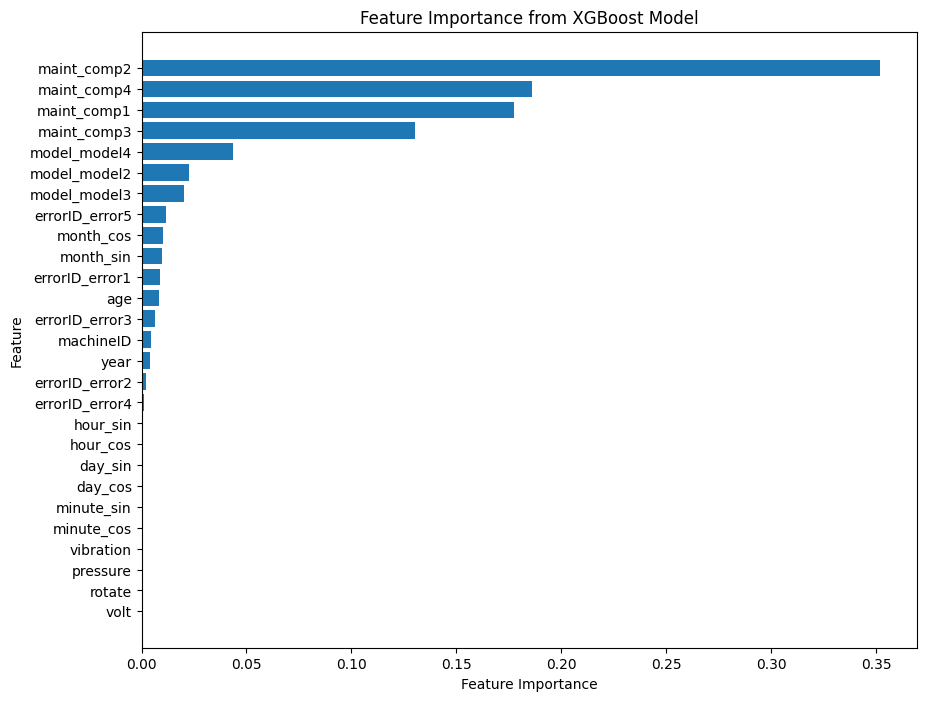

In [64]:
importances = model.feature_importances_
import matplotlib.pyplot as plt 

# Sort features by importance
sorted_idx = importances.argsort()
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost Model')
plt.show()

# DEPLOYMENT

In [65]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [66]:
# data8 = data4.drop(columns='failure')

In [67]:
# data8.to_csv('data8.csv', index=False)


In [68]:
data7.columns

Index(['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'age', 'year',
       'hour_sin', 'hour_cos', 'minute_sin', 'minute_cos', 'model_model2',
       'model_model3', 'model_model4', 'maint_comp1', 'maint_comp2',
       'maint_comp3', 'maint_comp4', 'errorID_error1', 'errorID_error2',
       'errorID_error3', 'errorID_error4', 'errorID_error5', 'day_sin',
       'day_cos', 'month_sin', 'month_cos', 'NoFail', 'comp1', 'comp2',
       'comp3', 'comp4'],
      dtype='object')